## Philippine education data visualization

* python-readable data is available in [google drive](https://drive.google.com/drive/folders/0B51bsxa_NT6KLUFTcHRHNVZ0MEk)
* check if figures from tjpalanca's [article](http://www.tjpalanca.com/2014/04/data-primer-education.html) can be reproduced
* add new/alternative plots

In [1]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [2]:
#my conda environment
import os
os.environ['CONDA_DEFAULT_ENV']

'astroconda'

In [3]:
from getpass import getuser

data_dir=os.path.join('/home',getuser(),'github/opendataph/education')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

enrolment=pd.read_csv(os.path.join(data_dir,'enrolment.csv'), index_col=0)

/home/jp/miniconda2/envs/astroconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
enrolment.head()

,school.id,year,enrollment,grade,gender,national.cohort,school.cohort
1,101746,2012,52,Kinder,Male,7,1752.0
2,102193,2012,25,Kinder,Male,7,2199.0
3,101283,2012,14,Kinder,Male,7,1289.0
4,100216,2012,15,Kinder,Male,7,222.0
5,100043,2012,10,Kinder,Male,7,49.0


In [7]:
enrolment.shape

(2411814, 7)

## grouping by grade and gender

In [12]:
total_students_per_grade = {}
total_students_per_gender = {}
total_students_per_gender['Female']=[]
total_students_per_gender['Male']=[]
#group by grade
for (grade,grade_group) in enrolment.groupby(by='grade'):
    #count per grade
    total_students_per_grade[grade]=[]
    total_students_per_grade[grade].append(grade_group['enrollment'].sum())
    print('{0}: {1}'.format(grade,grade_group['enrollment'].sum()))
    #group by gender
    for (gender, gender_group) in grade_group.groupby(by='gender'):
        #count per gender
        total_students_per_gender[gender].append(gender_group['enrollment'].sum())
        print('{0}: {1}'.format(gender,gender_group['enrollment'].sum()))

Grade 1: 10351185
Female: 4801586
Male: 5549599
Grade 2: 9576247
Female: 4495951
Male: 5080296
Grade 3: 9132380
Female: 4336632
Male: 4795748
Grade 4: 8480288
Female: 4106440
Male: 4373848
Grade 5: 7978193
Female: 3917925
Male: 4060268
Grade 6: 7478520
Female: 3736399
Male: 3742121
Kinder: 7123526
Female: 3477920
Male: 3645606
Year 1 / Grade 7: 6654775
Female: 3246198
Male: 3408577
Year 2 / Grade 8: 6030444
Female: 3020665
Male: 3009779
Year 3 / Grade 9: 5407958
Female: 2779669
Male: 2628289
Year 4 / Grade 10: 4814777
Female: 2529854
Male: 2284923


In [13]:
#create a dataframe
df_grade=pd.DataFrame(total_students_per_grade).T
df_grade.columns = ['total']
df_grade

,total
Grade 1,10351185
Grade 2,9576247
Grade 3,9132380
Grade 4,8480288
Grade 5,7978193
Grade 6,7478520
Kinder,7123526
Year 1 / Grade 7,6654775
Year 2 / Grade 8,6030444
Year 3 / Grade 9,5407958


In [14]:
#add columns to dataframe
df_grade['Female'] = total_students_per_gender['Female']
df_grade['Male']   = total_students_per_gender['Male']
df_grade.head()

,total,Female,Male
Grade 1,10351185,4801586,5549599
Grade 2,9576247,4495951,5080296
Grade 3,9132380,4336632,4795748
Grade 4,8480288,4106440,4373848
Grade 5,7978193,3917925,4060268


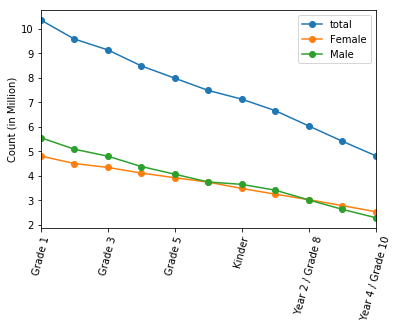

In [15]:
ax = df_grade.apply(lambda x: x/1e6).plot(marker='o', rot=75)
ax.set_ylabel('Count (in Million)')

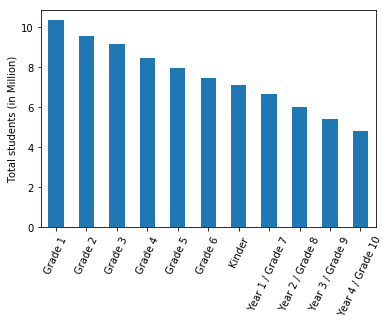

In [16]:
ax = df_grade['total'].apply(lambda x: x/1e6).plot(kind='bar', rot=65)
ax.set_ylabel('Total students (in Million)')

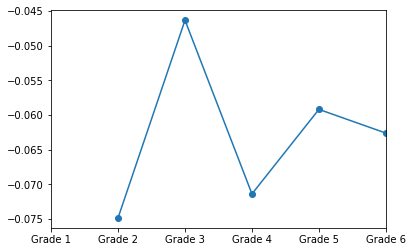

In [17]:
df_grade['total'].apply(lambda x: x*100).iloc[:6].pct_change().plot(marker='o')

## per region

In [19]:
school_expanded = pd.read_csv(os.path.join(data_dir,'school_expanded.csv'), index_col=0)
school_expanded.head()

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,map.lon,school.mooe,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped
1,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,120.498531,341000.0,15.0,0.0,0.0,0.0,0.0,1.0,20.0,0.0
2,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,120.586667,275000.0,13.0,3.0,0.0,0.0,0.0,2.0,12.0,4.0
3,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,120.460509,132000.0,7.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
4,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,120.695392,135000.0,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0
5,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,120.755890,182000.0,9.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0


In [20]:
#column names
school_expanded.columns

Index([u'school.id', u'school.name', u'school.region', u'school.region.name',
       u'school.province', u'school.cityhall', u'school.division',
       u'school.citymuni', u'school.district', u'school.legdistrict',
       u'school.type', u'school.abbrev', u'school.previousname',
       u'school.mother.id', u'school.address', u'school.head',
       u'school.head.designation', u'school.telephone', u'school.mobile',
       u'school.fax', u'school.email', u'school.established',
       u'school.classification', u'school.classification2',
       u'school.curricularclass', u'school.organization', u'school.cityincome',
       u'school.cityclass', u'school.urban', u'map.lat', u'map.lon',
       u'school.mooe', u'rooms.standard.academic', u'rooms.standard.unused',
       u'rooms.nonstandard.academic', u'rooms.nonstandard.unused',
       u'teachers.instructor', u'teachers.mobile', u'teachers.regular',
       u'teachers.sped'],
      dtype='object')

In [34]:
school_expanded['school.classification'].value_counts()

Elementary    38689
Secondary      7914
Name: school.classification, dtype: int64

In [36]:
school_expanded['school.classification2'].value_counts()

DepED Managed       45381
Local Government     1221
SUC Managed             1
Name: school.classification2, dtype: int64

In [37]:
school_expanded['school.urban'].value_counts()

Partially Urban    39896
Urban               3990
Rural               2714
Name: school.urban, dtype: int64

In [33]:
school_expanded['teachers.regular'].sum() #+ irregular teachers/instructors

501458.0

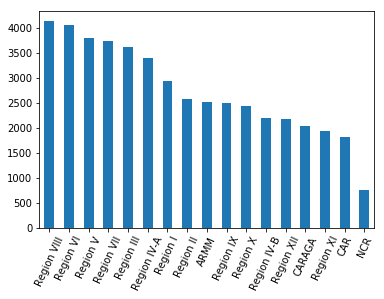

In [24]:
#count school per region
school_expanded['school.region'].value_counts().plot(kind='bar',rot=65)
#might need to divide by population

In [25]:
school_expanded['school.province'].value_counts()

CEBU                           1652
PANGASINAN                     1492
LEYTE                          1476
ILOILO                         1273
NEGROS OCCIDENTAL              1204
CAMARINES SUR                  1150
ISABELA                        1125
BOHOL                          1116
ZAMBOANGA DEL SUR              1079
QUEZON                         1038
WESTERN SAMAR                   973
BATANGAS                        957
LANAO DEL SUR                   932
NUEVA ECIJA                     916
NEGROS ORIENTAL                 890
NORTH COTABATO                  877
ZAMBOANGA DEL NORTE             849
CAGAYAN                         842
DAVAO DEL SUR                   827
PALAWAN                         814
BUKIDNON                        743
MASBATE                         725
ALBAY                           724
PAMPANGA                        711
BULACAN                         651
MAGUINDANAO                     628
MISAMIS ORIENTAL                627
SORSOGON                    